<a href="https://colab.research.google.com/github/amanoese/study_keras_for_colaboratory/blob/master/housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import boston_housing
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_data,train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data = (test_data - mean) / std

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 20
all_scores = []
for i in range(k):
  print('processing fold #',i)
  val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
  
  model = build_model()
  
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
  val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)
  
all_scores

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


[2.234944754307813, 2.6013775060672573, 2.8920935947116058, 2.5566020814499053]

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


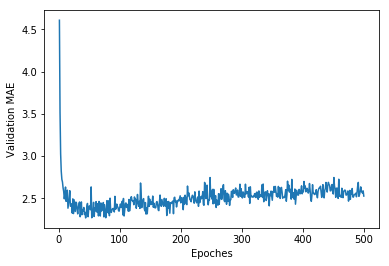

In [16]:
from keras.datasets import boston_housing
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_data,train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data = (test_data - mean) / std

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #',i)
  val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
  
  model = build_model()
  
  history = model.fit(
      partial_train_data,partial_train_targets,
      validation_data=(val_data,val_targets),
      epochs=num_epochs,batch_size=1,verbose=0)

  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)
  
all_mae_histories
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epoches')
plt.ylabel('Validation MAE')
plt.show()

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


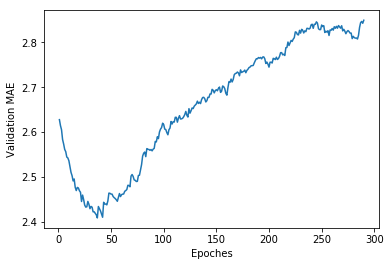

In [11]:
from keras.datasets import boston_housing
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_data,train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data = (test_data - mean) / std

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 300
all_mae_histories = []
for i in range(k):
  print('processing fold #',i)
  val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
  
  model = build_model()
  
  history = model.fit(
      partial_train_data,partial_train_targets,
      validation_data=(val_data,val_targets),
      epochs=num_epochs,batch_size=1,verbose=0)

  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)
  
all_mae_histories
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
      
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epoches')
plt.ylabel('Validation MAE')
plt.show()

In [12]:
from keras.datasets import boston_housing
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_data,train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data = (test_data - mean) / std

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

model = build_model()

model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data,test_targets)

test_mae_score


102/102 [==============================] - 1s 7ms/step


2.548499902089437